# Practice Problems
## Lesson 8: Neural Networks
---
Created by Terron Ishihara.  Modified for University of Washington, AI4All, 2020-21



## Problem 

Let's explore neural networks using scikit-learn's Multi-layer Perceptron (basically another name for a neural net). Naturally, we will use the MNIST hand-written digits dataset, which is essentially the "hello world" example for neural network classification.

> Start by importing the dataset and necessary Python libraries. This may take a little while since the dataset is a little larger than the ones we've used in past problems.  

#### You must run this script before running any of the other scripts in this notebook

In [1]:
import matplotlib.pyplot as plt    # charting library
import numpy as np                 # Python array library
import pandas as pd                # Pandas dataframe library
import joblib                      # for importing and storing classifier libraries
import datetime                    # for timing the build

# Logic to run this notebook on Google Colab.   Prior to running this notebook,
# Create a "\neural" folder under "\Colab Notebooks" and upload all support files up there.
# If run from from local Jupyter install, comment out drive commands and make FILEROOT an empty string.
 
#from google.colab import drive
#drive.mount("/drive", force_remount=True)
#FILEROOT = "/drive/My Drive/Colab Notebooks/neural/"
FILEROOT=""

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / X.max()
X.fillna(0,inplace=True) # modified for 2022

# Partition the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Image display functions

> display_array_as_image takes an 784 grey scale values as dissplays them as a grid.  Each data point is a 28x28 matrix of grayscale values between 0 and 1. Let's visualize this by plotting these values. Feel free to change the index into X to see what other digits are in the dataset.

> convert_image_to__grey_list takes a 28 * 28 jpg, png, or gif file and converts it to a Python list of 784 greyscale values with a dark background.  Feel free to create your own 28 * 28 jpg, png, or gif file and see how it works. 

<Figure size 432x288 with 0 Axes>

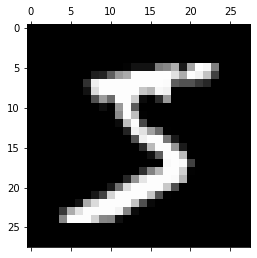

<Figure size 432x288 with 0 Axes>

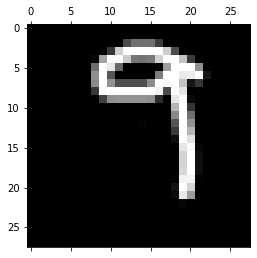

In [2]:
def display_array_as_image(image_array):
    image_array = pd.Series(image_array).values  # modified for 2022
    plt.gray() 
    # Since each data point is stored in a list of 784 values, we have
    # to reshape the list into a 28x28 array.
    digit = image_array.reshape(28,28)
    plt.matshow(digit)
    plt.show()
    
def convert_image_to_grey_list(filename):
    
    digitpic = plt.imread(filename)
    # check if image is the correct size
    if (len(digitpic) != 28 or len(digitpic[0]) != 28):
        raise ValueError("Image must be 28  * 28")
        
    digitpic = digitpic/digitpic.max()
    piclist = []
    for i in range(28):          # hardcoding lengths since must be 28 * 28 
        for j in range(28):
            pixel = digitpic[i][j]
            piclist.append((pixel[0]+pixel[1]+pixel[2])/3)
            
    if (sum(piclist) / len(piclist) > 0.5):   # if image is dark on light, then switch
            for i in range(len(piclist)):
                piclist[i] = 1 - piclist[i]
        
    return piclist 
  
# Test these functions   
display_array_as_image(X.iloc[0,])                   # takes one of the training images and displays
testImg = np.array(convert_image_to_grey_list(FILEROOT + "test3.png"))   # takes a file and converts it to a 784 greyscale list
display_array_as_image(testImg)                # display greyscale array

### Loading an MLP Model and displaying its accuracy

> The following code loads an already created model into the variable joblib_model. The model file is in the same folder as the Jupyter notebook.  Please see folder for other models you can load. 
> After loading the model, the predicted values for both the training set and test set are calculated and stored.

In [45]:
# Load from file
mnist_file = "mnist_model_0711.pkl"
joblib_model = joblib.load(FILEROOT + mnist_file)

# calculate predicted values for both training data and test date
print (datetime.datetime.now())
y_train_predict = joblib_model.predict(X_train)
y_test_predict = joblib_model.predict(X_test)

# display how accurate model is on test data
score = joblib_model.score(X_test, y_test)
print (score)
print (datetime.datetime.now())

2022-07-11 17:54:35.876002
0.9689714285714286
2022-07-11 17:54:36.188168


### Display how loaded MLP Model predicts a particular image

> Using the functions described above, the following code shows to display either a file or a particular training or test image and and then show the prediction made by the model for that image. 

<Figure size 432x288 with 0 Axes>

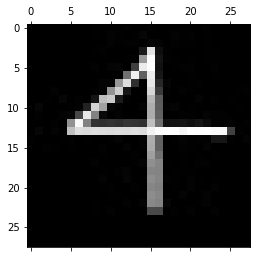

['9']


H:\NewUsers\everyday\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


<Figure size 432x288 with 0 Axes>

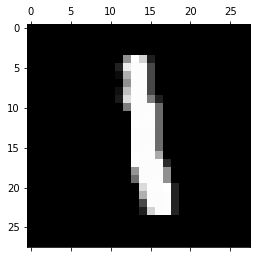

['1']


H:\NewUsers\everyday\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [43]:

testImg = np.array(convert_image_to_grey_list(FILEROOT + "test.jpg"))   # takes a file and converts it to a 784 greyscale list
display_array_as_image(testImg) 
print (joblib_model.predict(np.reshape(testImg,(-1,784)))) #print out prediction after converting image to format required by model


testImg3 = X.iloc[6,]                                           # takes either a training or test image
display_array_as_image(testImg3)
print (joblib_model.predict(np.reshape(pd.Series(testImg3).values,(1,784)))) #print out prediction after converting image to format required by model



### Analyzing Accuracy Results (Step 1: Dataframe Creation)

> The following code shows how to create a dataframe that maps the actual values of the test set vs the predicted values for further analysis. 

In [10]:
test_results = pd.DataFrame(columns=("actual","predict","count"))
test_results["actual"] = y_test
test_results["predict"] = y_test_predict
test_results["count"] = 1

### Analyzing Accuracy Results (Step 2: Analyze Accuracy by Cluster)
> The following code shows how to create a dataframe that shows the number of times the model gets each actual number correct/incorrect and the correct percentage for each actual number.  

In [11]:
# Shows how well each digit is analyzed
clf_byclass = pd.DataFrame(columns=("actual","correct","incorrect"))
clf_byclass["actual"] = range(10)
clf_byclass["correct"] = 0
clf_byclass["incorrect"] = 0
clf_byclass.set_index("actual")

for row in test_results.itertuples():
    r1 = int(row[1])
    r2 = int(row[2])
    if r1 == r2:
        clf_byclass.loc[r1,"correct"] = clf_byclass.loc[r1,"correct"] + 1
    else:
         clf_byclass.loc[r1,"incorrect"] =  clf_byclass.loc[r1,"incorrect"] + 1
 
  
clf_byclass["pct"] = clf_byclass["correct"] / (clf_byclass["correct"] + clf_byclass["incorrect"])
clf_byclass

,actual,correct,incorrect,pct
0,0,1758,8,0.995470
1,1,1922,5,0.997405
2,2,1694,10,0.994131
3,3,1751,23,0.987035
4,4,1716,11,0.993631
5,5,1578,15,0.990584
6,6,1733,9,0.994834
7,7,1830,11,0.994025
8,8,1705,18,0.989553
9,9,1685,18,0.989430


### Analyzing Accuracy Results (Step 3: Analyze Errors by Cluster)
> The following code shows how to create a pivot table that shows the number of errors of each type occured for each actual value

In [12]:
test_error = test_results[test_results["predict"]!=test_results["actual"]]  # get only errors
test_error_pivot = pd.pivot_table(test_error, values=['count'], index=['actual'],columns=['predict'], aggfunc=np.sum) #create pivot table
test_error_pivot

count                           
predict     0  1  2  3  4  5  6  7  8  9
actual                                  
0           0  0  1  0  2  2  1  0  2  0
1           0  0  2  3  0  0  0  0  0  0
2           3  0  0  3  1  0  1  2  0  0
3           1  1  2  0  0  6  0  2  3  8
4           1  1  0  0  0  0  2  0  2  5
5           1  0  0  1  1  0  6  0  6  0
6           2  2  1  0  2  1  0  0  1  0
7           1  0  1  0  1  0  2  0  1  5
8           2  2  2  4  1  2  4  0  0  1
9           2  0  0  3  6  3  0  2  2  0

### Build Your Own Classifier

> After you have investigated how well the classifier may work, you can try initializing and building your own classifier, training it, and observe how well the classifier works on our test set. 

> The `hidden_layer_sizes` parameter accepts a tuple that specifies the number of hidden layers and the number of neurons per layer. The `solver` parameter specifies that we'll use Stochastic Gradient Descent.

> * `hidden_layer_sizes`: The number of hidden layers and number of neurons per layer. For example, the tuple (64, 32, 16) represents 3 hidden layers, with 64, 32, and 16 neurons, respectively.
> * `solver`: The solver for weight optimization. We learned about Stochastic Gradient Descent, so we use that here.
> * `activation`: The activation function for the hidden layers. Possible values are `'identity'`, `'logistic'`, `'tanh'`, and `'relu'`.
> * `max_iter`: The maximum number of iterations (updates) to perform. Ideally, the weights will converge, meaning the updates hardly change the weights. Keeping this value low will prevent the code from taking a long time (but may sacrifice accuracy).

> The setup provided below is not very accurate at predicting on the test set. Go ahead and run the code to see the resulting score. 

> Try changing the parameters for the classifier and see how it affects the score. (`solver` needn't be changed since stochastic gradient descent is the only solver we learned about.) For example, which activation function that we mentioned in the lesson may be very effective?

> Note that the code also saves the model created to a file so that it can be further analyzed using the code above.   For each new classifier that you want to save. either change the name of the model file in the code below or change it in the file system after the model has been saved. 

In [44]:
from sklearn.neural_network import MLPClassifier


# Initialize the classifier.  
# This takes a long time to run but does work

print (datetime.datetime.now())
#mlp_clf = MLPClassifier(
#    hidden_layer_sizes=(64,32), 
#    solver='sgd', 
#    activation='logistic',
#    max_iter=100
#)

mlp_clf = MLPClassifier(
    hidden_layer_sizes=(64, 32, 16), 
    solver='sgd', 
    activation='relu',
    max_iter=1000
)

# Train the classifier
mlp_clf.fit(X_train, y_train)

print (datetime.datetime.now())

# Save the model file in the current working directory.   Change the file name for each iteration
#mnist_file = FILEROOT + "mnist_model_zzzz.pkl"
mnist_file = FILEROOT + "mnist_model_0711.pkl"
joblib.dump(mlp_clf, mnist_file)

# Get the mean accuracy on the test data and print it
score = mlp_clf.score(X_test, y_test)
print (score)

print (datetime.datetime.now())

2022-07-11 17:43:51.926743
2022-07-11 17:50:35.939163
0.9689714285714286
2022-07-11 17:50:36.419234
